In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
toyota=pd.read_csv("Toyota.csv")
toyota.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


In [4]:
toyota['FuelType'].value_counts().index[0]

'Petrol'

In [5]:
toyota['FuelType'].fillna(toyota['FuelType']\
                         .value_counts().index[0],\
                         inplace=True)

In [6]:
toyota['MetColor'].mode()

0    1.0
Name: MetColor, dtype: float64

In [7]:
toyota['MetColor'].fillna(toyota['MetColor'].mode()[0],\
                   inplace=True)

In [8]:
toyota['Age'].mean()

55.67215568862275

In [9]:
toyota['Age'].fillna(toyota['Age'].mean(),\
                   inplace=True)

In [10]:
toyota['HP'].mode()

0    110
Name: HP, dtype: object

In [11]:
toyota['HP'].fillna(toyota['HP'].mode(),\
                   inplace=True)

In [12]:
toyota.describe()

,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,0.708914,0.055710,1566.827994,1072.45961
std,3626.964585,17.930380,0.454421,0.229441,187.182436,52.64112
min,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,44.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,59.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,68.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [13]:
toyota.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [14]:
toyota['Age'] = toyota.Age.astype(int)

toyota['MetColor'] = toyota.MetColor.astype(int)


In [15]:
print(toyota.dtypes)

Price         int64
Age           int64
KM           object
FuelType     object
HP           object
MetColor      int64
Automatic     int64
CC            int64
Doors        object
Weight        int64
dtype: object


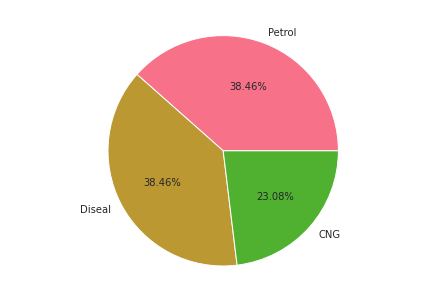

In [71]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
#l = ['Versicolor', 'Setosa', 'Virginica']
l = ['Petrol', 'Diseal', 'CNG']
 
s = [50,50,30]
ax.pie(s, labels = l,autopct='%2.2f%%')
plt.show()

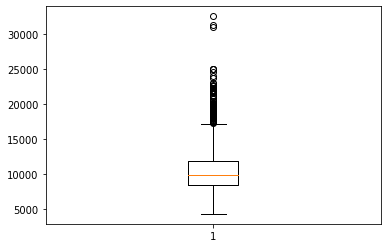

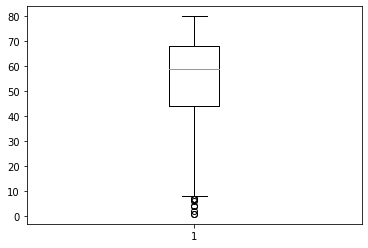

In [17]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([toyota['Price']])
plt.figure(2)
plt.boxplot([toyota['Age']])
plt.show()

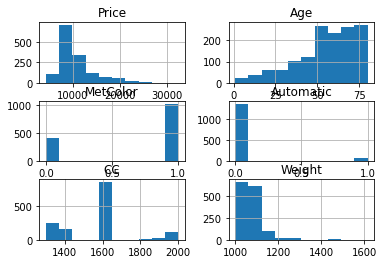

In [18]:
plt.figsize=(32,6)
toyota.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

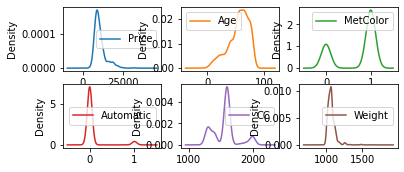

In [19]:
toyota.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Price           AxesSubplot(0.125,0.536818;0.133621x0.343182)
Age          AxesSubplot(0.285345,0.536818;0.133621x0.343182)
MetColor      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Automatic    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
CC           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Weight             AxesSubplot(0.125,0.125;0.133621x0.343182)
dtype: object

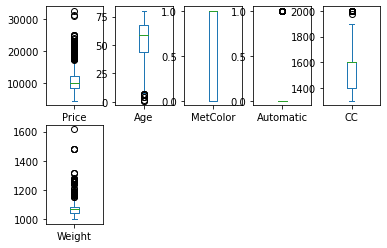

In [20]:
toyota.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<AxesSubplot:xlabel='Automatic', ylabel='MetColor'>

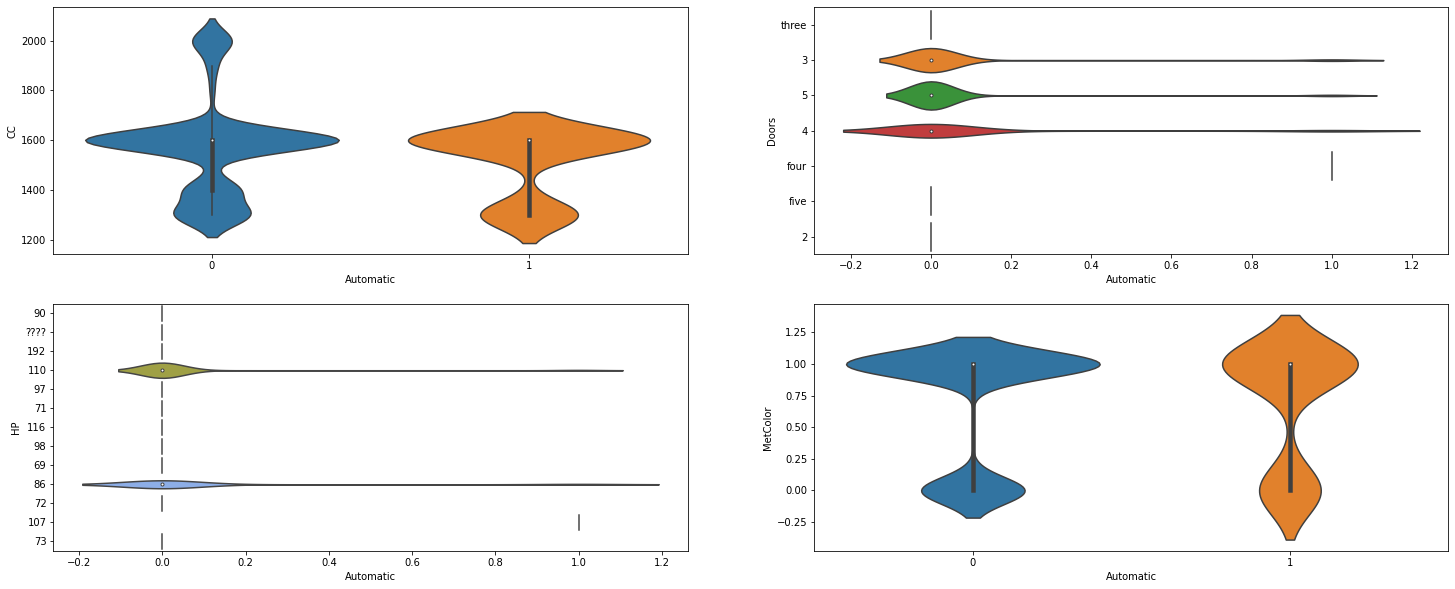

In [21]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.violinplot(x='Automatic',y='CC',data=toyota)
plt.subplot(2,2,2)
sns.violinplot(x='Automatic',y='Doors',data=toyota)
plt.subplot(2,2,3)
sns.violinplot(x='Automatic',y='HP',data=toyota)
plt.subplot(2,2,4)
sns.violinplot(x='Automatic',y='MetColor',data=toyota)

<AxesSubplot:xlabel='Price', ylabel='count'>

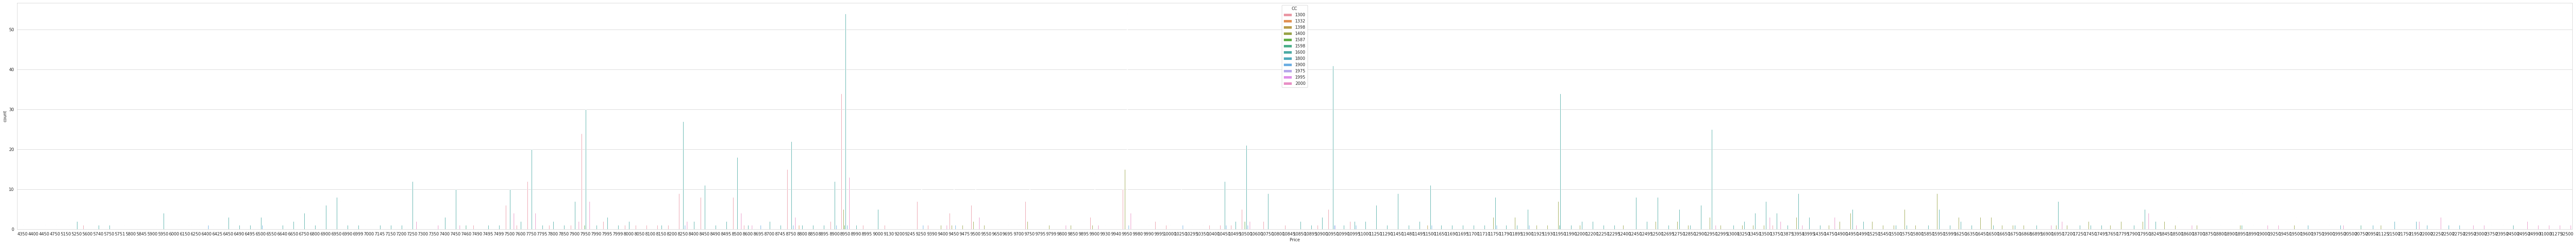

In [22]:
plt.figure(figsize=(110,10))
sns.set_style('whitegrid')
sns.countplot(x = 'Price',hue='CC',data=toyota)

Average age of Price per
 Price
4350     44.0
4400     74.0
4450     56.0
4750     44.0
5150     56.0
         ... 
24950     8.0
24990     8.0
31000     4.0
31275     4.0
32500    55.0
Name: Age, Length: 236, dtype: float64


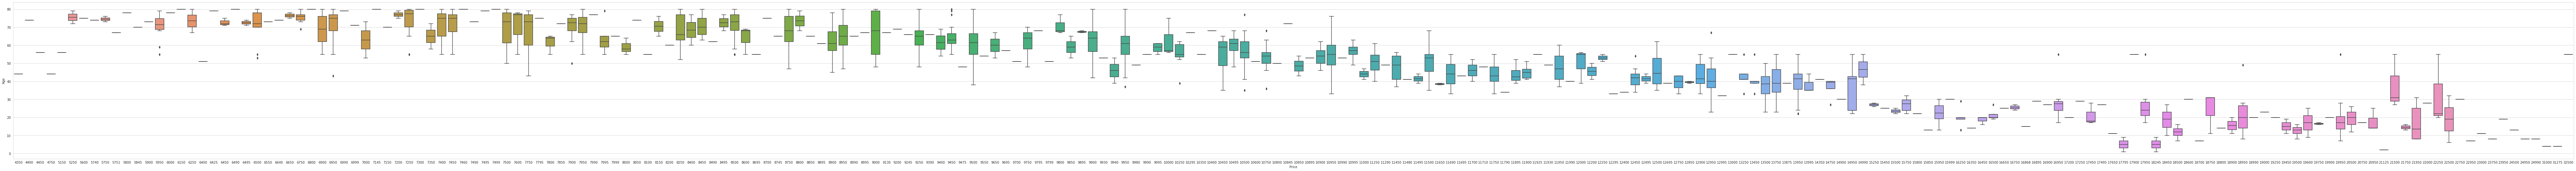

In [23]:
plt.figure(figsize=(143, 9))
sns.boxplot(x='Price',y='Age',data=toyota)
print('Average age of Price per\n', toyota.groupby(["Price"])["Age"].mean().round(0))

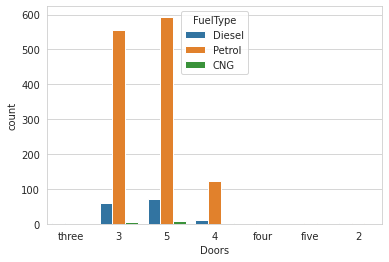

In [24]:
sns.countplot(x = "Doors", hue="FuelType", data=toyota)
plt.show()

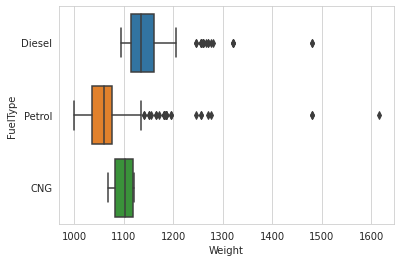

In [25]:
sns.boxplot(y="FuelType", x = "Weight", data = toyota[toyota["Weight"]>0])
plt.show()

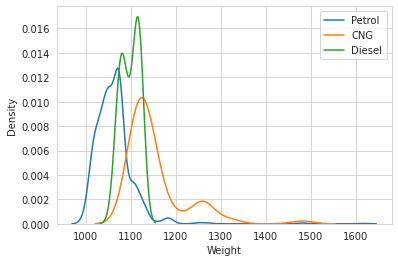

In [26]:
plt.figure()
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "CNG"]) 
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Petrol", "CNG","Diesel","0"])
plt.show()

In [27]:
toyota["Age"]

0       23
1       23
2       24
3       26
4       30
        ..
1431    55
1432    72
1433    55
1434    70
1435    76
Name: Age, Length: 1436, dtype: int64

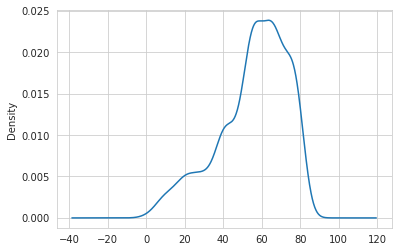

In [28]:
toyota["Age"].plot.kde()
plt.show()

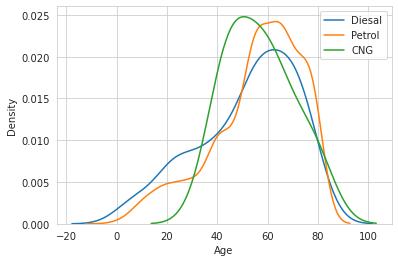

In [29]:
plt.figure()
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "CNG"])
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Diesal","Petrol","CNG","0"])
plt.show()

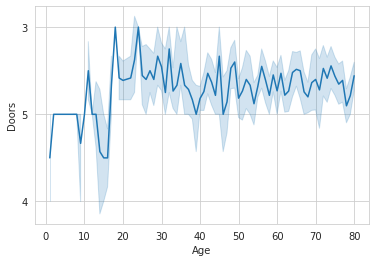

In [30]:
sns.lineplot(x="Age", y="Doors", data=toyota)
plt.show()

<AxesSubplot:xlabel='Doors', ylabel='count'>

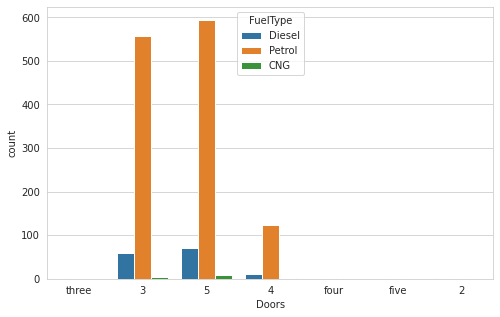

In [31]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Doors',hue='FuelType',data=toyota)

<function matplotlib.pyplot.show(close=None, block=None)>

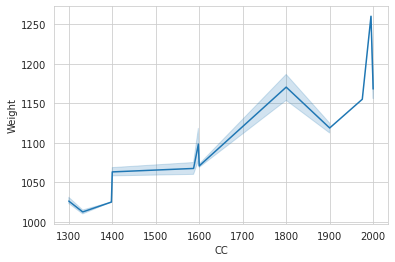

In [32]:
sns.lineplot(x="CC", y="Weight", data=toyota)
plt.show

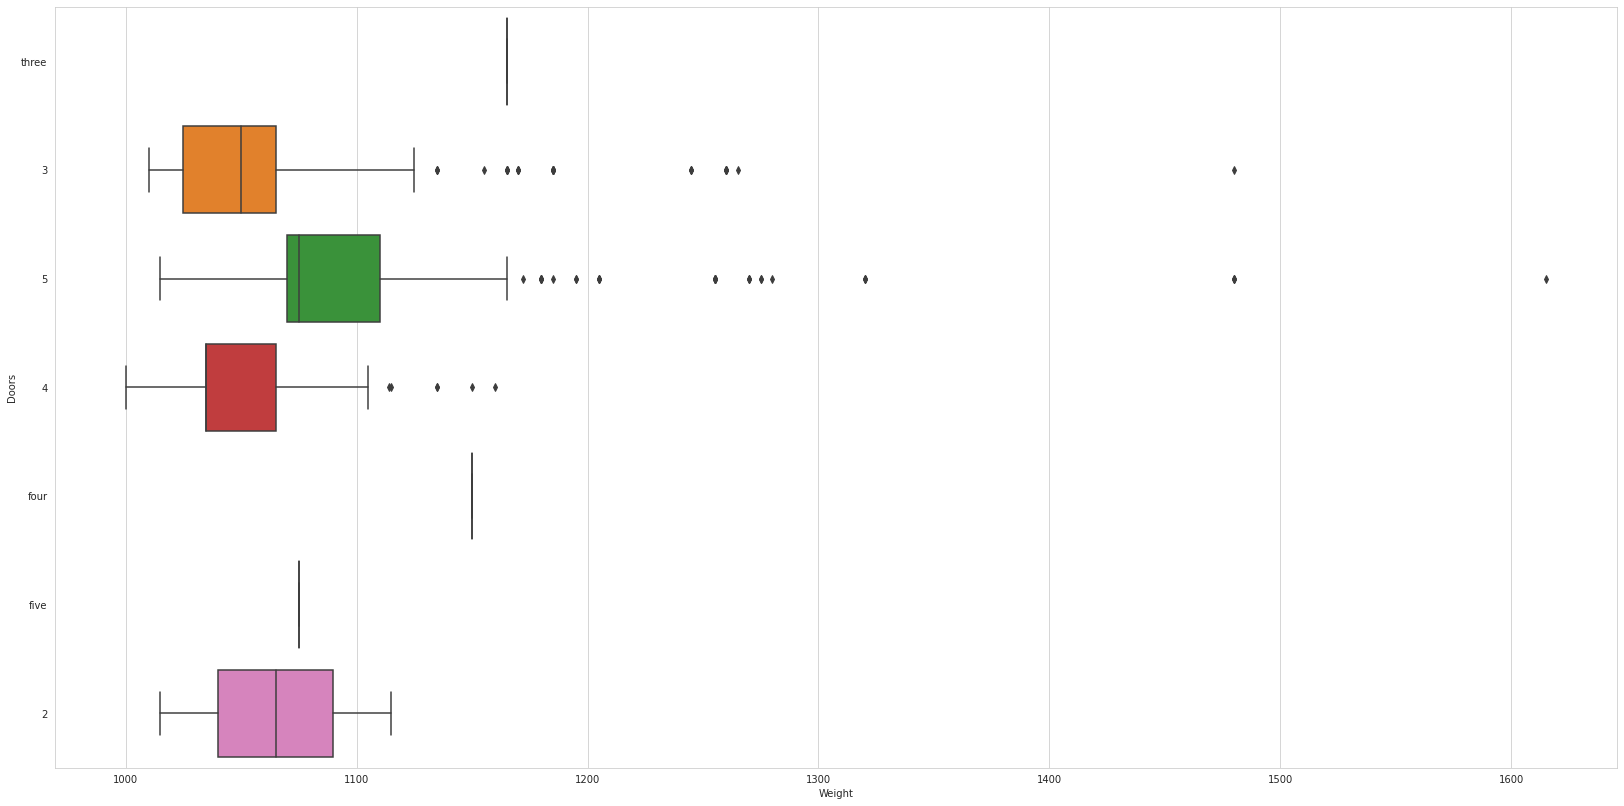

In [33]:
plt.figure(figsize=(28,14))
sns.boxplot(y="Doors", x = "Weight", data = toyota[toyota["Weight"]> 0])
plt.show()

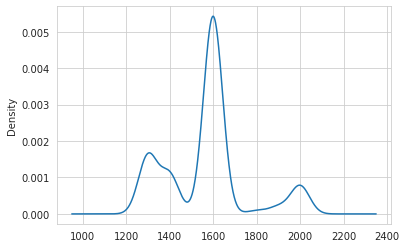

In [34]:
toyota["CC"].plot.kde()
plt.show()

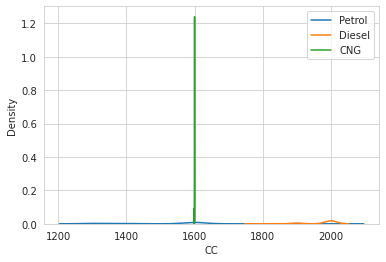

In [35]:
plt.figure()
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "CNG"])
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Petrol", "Diesel","CNG","0"])
plt.show()

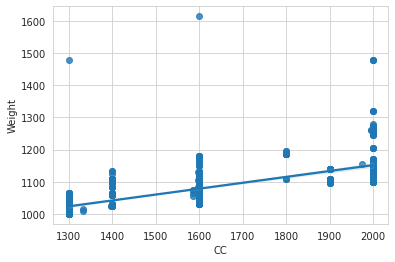

In [36]:
sns.regplot(x="CC", y="Weight", data=toyota[toyota.Weight>0])
plt.show()

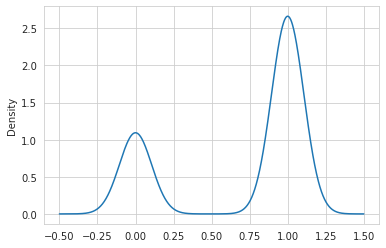

In [37]:
toyota["MetColor"].plot.kde()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

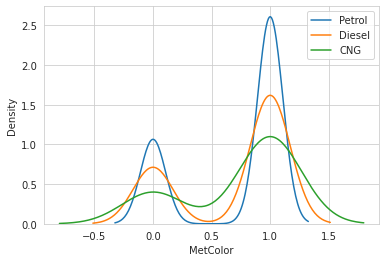

In [38]:
plt.figure()
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "CNG"])
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Petrol", "Diesel","CNG","0"])
plt.show

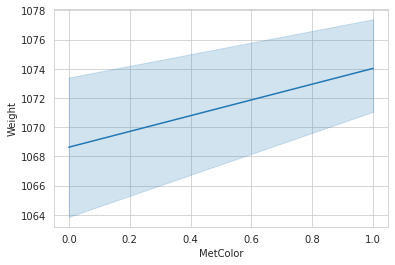

In [39]:
sns.lineplot(x="MetColor", y="Weight", data=toyota[toyota.Weight>0])
plt.show()

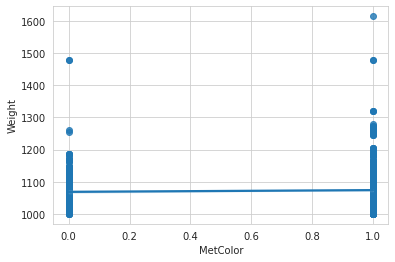

In [40]:
sns.regplot(x="MetColor", y="Weight", data=toyota[toyota.Weight>0])
plt.show()

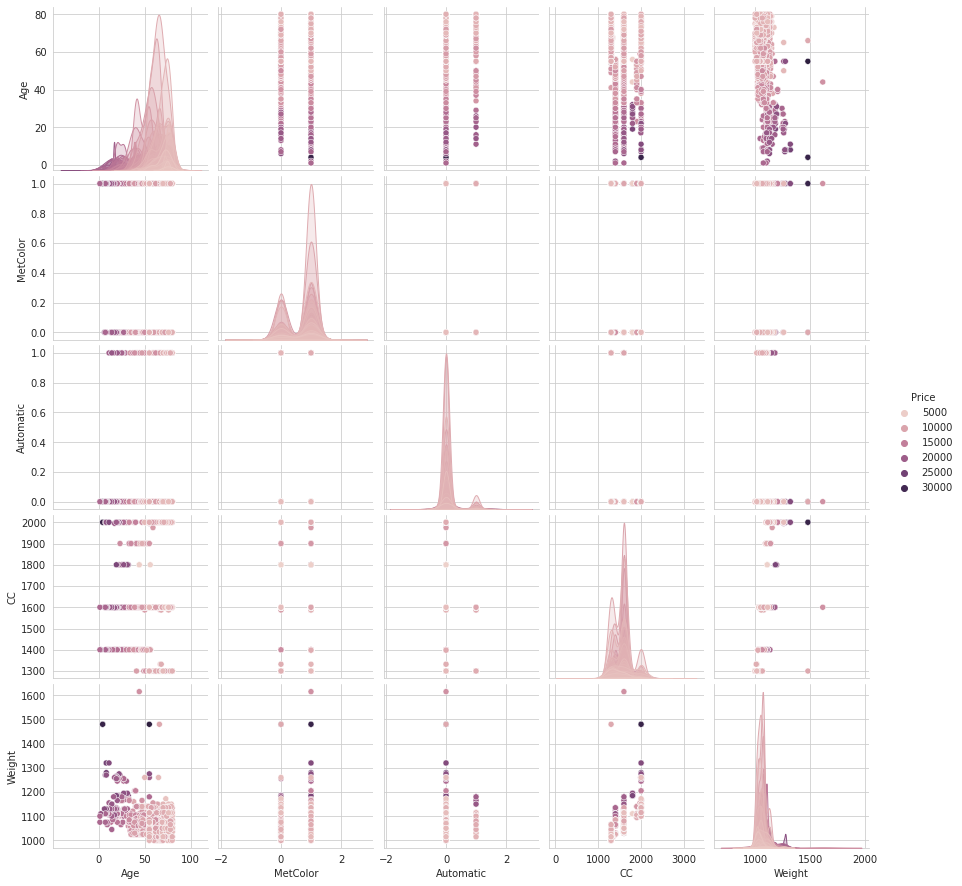

In [41]:
sns.pairplot(toyota,hue='Price');

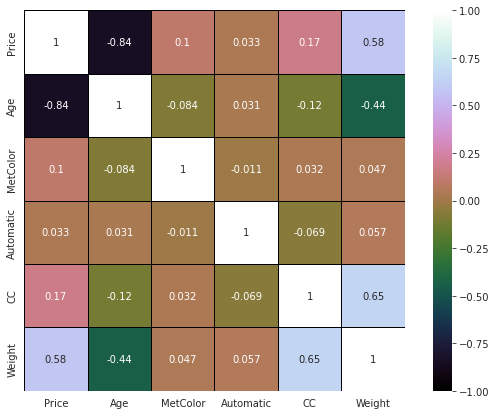

In [42]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(toyota.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
toyota["FuelType"] = le.fit_transform(toyota["FuelType"])
toyota["HP"] = le.fit_transform(toyota["HP"])
toyota["KM"] = le.fit_transform(toyota["KM"])
toyota["Doors"] = le.fit_transform(toyota["Doors"])

In [44]:
toyota.head(4)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,560,1,9,1,0,2000,6,1165
1,13750,23,958,1,9,1,0,2000,1,1165
2,13950,24,495,1,9,1,0,2000,1,1165
3,14950,26,579,1,9,0,0,2000,1,1165


In [45]:
Y = toyota["Price"]
X = toyota.drop(["FuelType"],axis=1)

In [46]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)

In [47]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_Train = rs.fit_transform(X_Train)
X_Test = rs.fit_transform(X_Test)

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [49]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [50]:
lr.score(X_Test, Y_Test)

0.1423611111111111

In [51]:
Y_Pred1 = lr.predict(X_Test)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred1})

In [52]:
Y_Test_Pred = Y_Test_Pred.reset_index()

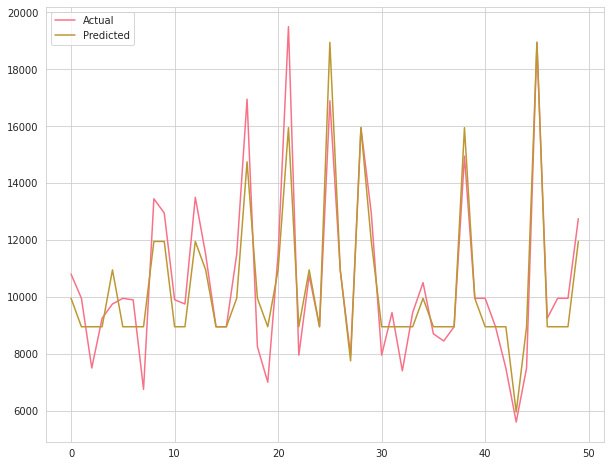

In [53]:
sns.set_palette("husl")
plt.figure(figsize=(10, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred[:50])
plt.legend(["Actual", "Predicted"])

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [55]:
knn.fit(X_Train , Y_Train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
knn.score(X_Train , Y_Train)

0.30923344947735193

In [57]:
knn.score(X_Test, Y_Test)

0.15625

In [58]:
Y_Pred2 = knn.predict(X_Test)
Y_Test_Pred2 = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred2})

In [59]:
Y_Test_Pred2 = Y_Test_Pred2.reset_index()

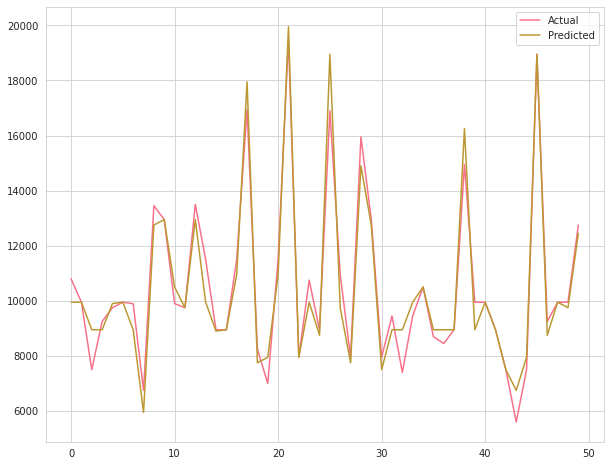

In [60]:
plt.figure(figsize=(10, 8))
Y_Test_Pred2 = Y_Test_Pred2.drop(["index"], axis=1)
plt.plot(Y_Test_Pred2[:50])
plt.legend(["Actual", "Predicted"])

In [61]:
from sklearn.tree  import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features = 6, max_depth = 4)
dt.fit(X_Train , Y_Train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [62]:
dt.score(X_Train , Y_Train)

0.3405923344947735

In [63]:
dt.score(X_Test , Y_Test)

0.2951388888888889

[Text(0.4375, 0.9, 'X[0] <= -0.265\ngini = 0.978\nsamples = 1148\nvalue = [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 11, 1, 1\n2, 1, 1, 2, 1, 1, 8, 1, 8, 1, 11, 20, 1, 1\n1, 1, 2, 13, 1, 2, 2, 12, 1, 1, 1, 16, 3, 29\n1, 2, 1, 9, 48, 1, 3, 3, 1, 1, 2, 1, 32, 1\n13, 1, 23, 3, 1, 1, 1, 34, 2, 1, 1, 13, 87\n1, 4, 1, 1, 1, 21, 1, 2, 20, 1, 24, 1, 1, 1\n1, 22, 1, 1, 3, 2, 1, 17, 1, 64, 1, 1, 4, 3\n10, 1, 1, 1, 15, 3, 28, 17, 1, 1, 1, 5, 46\n1, 5, 1, 7, 1, 11, 1, 13, 2, 1, 1, 2, 1, 12\n1, 3, 5, 1, 1, 37, 1, 2, 1, 1, 1, 1, 8, 1\n8, 1, 6, 1, 4, 21, 1, 1, 5, 2, 11, 7, 1, 12\n3, 1, 4, 1, 7, 2, 1, 1, 2, 5, 1, 1, 12, 1\n4, 1, 3, 4, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1\n1, 8, 2, 3, 4, 1, 1, 2, 1, 2, 9, 1, 1, 1\n2, 3, 2, 2, 1, 10, 2, 1, 3, 1, 3, 2, 4, 3\n2, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.20833333333333334, 0.7, 'X[0] <= -0.279\ngini = 0.926\nsamples = 456\nvalue = [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 11, 1, 1\n2, 1, 1, 2, 1, 1, 8, 1, 8, 1, 11, 20, 1, 1\n1, 1, 2, 13, 1, 2, 2, 12, 1, 1, 1, 16, 3, 29\n1, 2, 1, 9, 48, 1

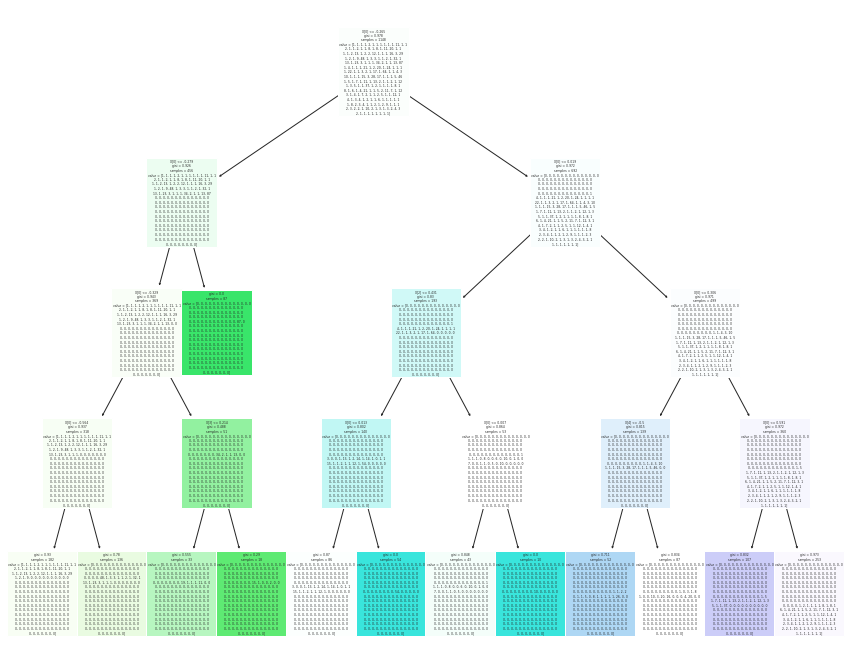

In [64]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

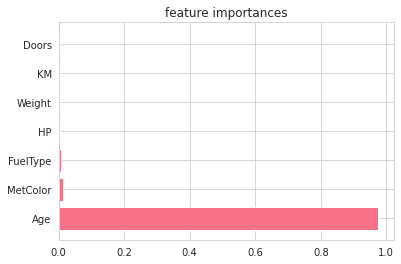

In [66]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = toyota.drop(["Price"], axis=1).columns

f_importances(abs(dt.feature_importances_), features_names, top=7)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features = 5, max_depth = 4)
rf.fit(X_Train , Y_Train)
rf.score(X_Train , Y_Train)

0.46689895470383275

In [68]:
rf.score(X_Test , Y_Test)

0.3645833333333333

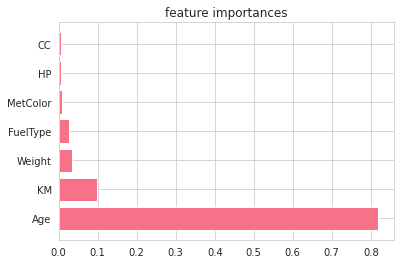

In [69]:
f_importances(abs(rf.feature_importances_), features_names, top=7)